In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from ltspice import  Ltspice

In [2]:
raw_file_path='simulation/optimize_C1.raw'
lt=Ltspice(raw_file_path)
lt.parse()

Available Signals:
['time', 'V(n004)', 'V(n002)', 'V(n003)', 'V(n005)', 'V(n001)', 'V(n006)', 'Id(M1)', 'Ig(M1)', 'Ib(M1)', 'Is(M1)', 'Id(M2)', 'Ig(M2)', 'Ib(M2)', 'Is(M2)', 'Id(M3)', 'Ig(M3)', 'Ib(M3)', 'Is(M3)', 'Id(M4)', 'Ig(M4)', 'Ib(M4)', 'Is(M4)', 'Id(M5)', 'Ig(M5)', 'Ib(M5)', 'Is(M5)', 'Id(M6)', 'Ig(M6)', 'Ib(M6)', 'Is(M6)', 'Id(M7)', 'Ig(M7)', 'Ib(M7)', 'Is(M7)', 'Id(M8)', 'Ig(M8)', 'Ib(M8)', 'Is(M8)', 'I(C1)', 'I(C2)', 'I(V1)', 'I(V2)', 'I(V3)']


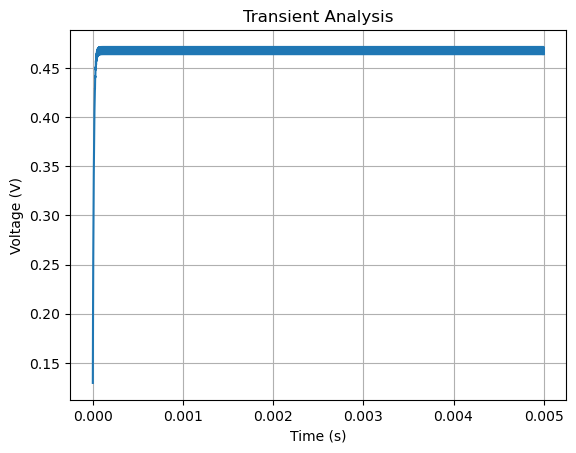

Simulation Flags:
['', 'real', 'forward', 'stepped']
Simulation Variables and Types:
['time', 'V(n004)', 'V(n002)', 'V(n003)', 'V(n005)', 'V(n001)', 'V(n006)', 'Id(M1)', 'Ig(M1)', 'Ib(M1)', 'Is(M1)', 'Id(M2)', 'Ig(M2)', 'Ib(M2)', 'Is(M2)', 'Id(M3)', 'Ig(M3)', 'Ib(M3)', 'Is(M3)', 'Id(M4)', 'Ig(M4)', 'Ib(M4)', 'Is(M4)', 'Id(M5)', 'Ig(M5)', 'Ib(M5)', 'Is(M5)', 'Id(M6)', 'Ig(M6)', 'Ib(M6)', 'Is(M6)', 'Id(M7)', 'Ig(M7)', 'Ib(M7)', 'Is(M7)', 'Id(M8)', 'Ig(M8)', 'Ib(M8)', 'Is(M8)', 'I(C1)', 'I(C2)', 'I(V1)', 'I(V2)', 'I(V3)']


In [3]:

print("Available Signals:")
print(lt.variables)  

time = lt.time  
signal = lt.get_data('V(n005)')  


plt.plot(time, signal)
plt.title("Transient Analysis")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.grid()
plt.show()


print("Simulation Flags:")
print(lt.flags)  


print("Simulation Variables and Types:")
print(lt.variables)  

In [4]:

start_value = 0.01  
end_value = 10      
increment = 0.5     

capacitor_values = np.arange(start_value, end_value + increment, increment)
sweep_steps = lt.case_count
data = {'C(nF)': [], 'Time (ms)': [], 'Vout (mV)': [], 'Input (mV)': []}

for i in range(sweep_steps):
    time = lt.get_time(case=i)
    vout = lt.get_data('V(n005)', case=i)
    input_signal = lt.get_data('V(n003)', case=i)
    
    for t, v, v_in in zip(time, vout, input_signal):
        data['C(nF)'].append(capacitor_values[i])  
        data['Time (ms)'].append(t * 1000)  
        data['Vout (mV)'].append(v * 1000)  
        data['Input (mV)'].append(v_in * 1000)  

df = pd.DataFrame(data)
output_path = 'results/capacitance_simulation_results.csv'
df.to_csv(output_path, index=False)

print(f"Data saved successfully to {output_path}")


Data saved successfully to results/capacitance_simulation_results.csv


In [5]:

results = []

for i in range(sweep_steps):
    signal = lt.get_data('V(n005)', i)  
    time = lt.get_time(i) 
    
    peak_voltage = np.max(signal)
    min_signal = np.min(signal)
    ripple = peak_voltage - min_signal
    settling_time = time[np.where(signal >= 0.98 * peak_voltage)[0][0]] if len(np.where(signal >= 0.98 * peak_voltage)[0]) > 0 else None
    max_voltage = -float('inf')
    min_voltage = float('inf')

    if peak_voltage > max_voltage:
        max_voltage = peak_voltage
        optimal_c1 = float(f"{capacitor_values[i]:.4f}")
        optimal_step = i

    min_voltage = min(min_voltage, min_signal)

    results.append({
        'Capacitance (C1) [nF]': float(f"{capacitor_values[i]:.4f}"),
        'Peak Voltage [mV]': peak_voltage * 1000,    
        'Min Voltage [mV]': min_signal * 1000,        
        'Ripple Voltage [mV]': ripple * 1000,          
        'Settling Time (ms)': settling_time * 1000 if settling_time is not None else None,    
    })

results_df = pd.DataFrame(results)
output_path = "results/comprehensive_analysis_C1.csv"
results_df.to_csv(output_path, index=False)

print(f"Data saved successfully to {output_path}")


Data saved successfully to results/comprehensive_analysis_C1.csv


In [6]:
raw_file_path='simulation/optimize_Fosc.raw'
lt=Ltspice(raw_file_path)
lt.parse()

Available Signals:
['time', 'V(n004)', 'V(n002)', 'V(n003)', 'V(n005)', 'V(n001)', 'V(n006)', 'Id(M1)', 'Ig(M1)', 'Ib(M1)', 'Is(M1)', 'Id(M2)', 'Ig(M2)', 'Ib(M2)', 'Is(M2)', 'Id(M3)', 'Ig(M3)', 'Ib(M3)', 'Is(M3)', 'Id(M4)', 'Ig(M4)', 'Ib(M4)', 'Is(M4)', 'Id(M5)', 'Ig(M5)', 'Ib(M5)', 'Is(M5)', 'Id(M6)', 'Ig(M6)', 'Ib(M6)', 'Is(M6)', 'Id(M7)', 'Ig(M7)', 'Ib(M7)', 'Is(M7)', 'Id(M8)', 'Ig(M8)', 'Ib(M8)', 'Is(M8)', 'I(C1)', 'I(C2)', 'I(V1)', 'I(V2)', 'I(V3)']


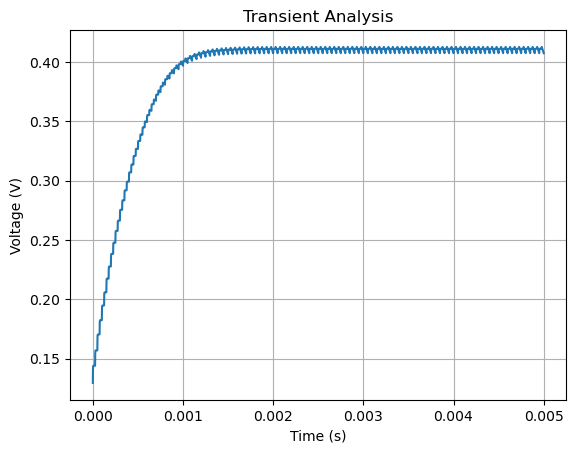

Simulation Flags:
['', 'real', 'forward', 'stepped']
Simulation Variables and Types:
['time', 'V(n004)', 'V(n002)', 'V(n003)', 'V(n005)', 'V(n001)', 'V(n006)', 'Id(M1)', 'Ig(M1)', 'Ib(M1)', 'Is(M1)', 'Id(M2)', 'Ig(M2)', 'Ib(M2)', 'Is(M2)', 'Id(M3)', 'Ig(M3)', 'Ib(M3)', 'Is(M3)', 'Id(M4)', 'Ig(M4)', 'Ib(M4)', 'Is(M4)', 'Id(M5)', 'Ig(M5)', 'Ib(M5)', 'Is(M5)', 'Id(M6)', 'Ig(M6)', 'Ib(M6)', 'Is(M6)', 'Id(M7)', 'Ig(M7)', 'Ib(M7)', 'Is(M7)', 'Id(M8)', 'Ig(M8)', 'Ib(M8)', 'Is(M8)', 'I(C1)', 'I(C2)', 'I(V1)', 'I(V2)', 'I(V3)']


In [7]:



print("Available Signals:")
print(lt.variables)  


time = lt.time  
signal = lt.get_data('V(n005)')  


plt.plot(time, signal)
plt.title("Transient Analysis")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.grid()
plt.show()


print("Simulation Flags:")
print(lt.flags)  


print("Simulation Variables and Types:")
print(lt.variables)

In [8]:


start_value = 20 
end_value =  1000 
increment = 50   

frequency_values = np.arange(start_value, end_value + increment, +increment)  
  
sweep_steps = len(frequency_values)

data = {'Frequency (KHz)': [], 'Time (ms)': [], 'Vout (mV)': [], 'Input (mV)': []}

for i in range(sweep_steps):
    time = lt.get_time(case=i)  
    input_signal = lt.get_data(name='V(n003)', case=i)  
    output_signal = lt.get_data(name='V(n005)', case=i)  
    
    for t, vin, vout in zip(time, input_signal, output_signal):
        data['Frequency (KHz)'].append(frequency_values[i])
        data['Time (ms)'].append(t * 1000)    
        data['Vout (mV)'].append(vout * 1000)    
        data['Input (mV)'].append(vin * 1000)    

df = pd.DataFrame(data)

output_path = 'results/frequency_sweep_simulation_results.csv'
df.to_csv(output_path, index=False)

print(f"Data saved successfully to {output_path}")


Data saved successfully to results/frequency_sweep_simulation_results.csv


In [9]:
results = []

for i in range(sweep_steps):
    signal = lt.get_data('V(n005)', i)  
    time = lt.get_time(i)  

    peak_voltage = np.max(signal)
    min_signal = np.min(signal)
    ripple = peak_voltage - min_signal
    settling_time = time[np.where(signal >= 0.98 * peak_voltage)[0][0]] if len(np.where(signal >= 0.98 * peak_voltage)[0]) > 0 else None

    max_voltage = -float('inf')
    min_voltage = float('inf')

    if peak_voltage > max_voltage:
        max_voltage = peak_voltage
        optimal_c1 = frequency_values[i]
        optimal_step = i

    min_voltage = min(min_voltage, min_signal)

    results.append({
        'Frequency (KHz)': frequency_values[i],
        'Peak Voltage (mV)': peak_voltage * 1000,  
        'Min Voltage (mV)': min_signal * 1000,  
        'Ripple Voltage (mV)': ripple * 1000,  
        'Settling Time (ms)': settling_time * 1000 if settling_time is not None else None,  
    })

output_path = "results/comprehensive_analysis_F_Osc.csv"
results_df = pd.DataFrame(results)
results_df.to_csv(output_path, index=False)
print(f"Data saved successfully to {output_path}")


Data saved successfully to results/comprehensive_analysis_F_Osc.csv


In [18]:
raw_file_path='simulation/optimize_R1.raw'
lt=Ltspice(raw_file_path)
lt.parse()

In [19]:

print("Available Signals:")
print(lt.variables)  

print("Simulation Flags:")
print(lt.flags)  


print("Simulation Variables and Types:")
print(lt.variables)  

Available Signals:
['time', 'V(n005)', 'V(n003)', 'V(n004)', 'V(n002)', 'V(n001)', 'V(n006)', 'Id(M1)', 'Ig(M1)', 'Ib(M1)', 'Is(M1)', 'Id(M2)', 'Ig(M2)', 'Ib(M2)', 'Is(M2)', 'Id(M3)', 'Ig(M3)', 'Ib(M3)', 'Is(M3)', 'Id(M4)', 'Ig(M4)', 'Ib(M4)', 'Is(M4)', 'Id(M5)', 'Ig(M5)', 'Ib(M5)', 'Is(M5)', 'Id(M6)', 'Ig(M6)', 'Ib(M6)', 'Is(M6)', 'Id(M7)', 'Ig(M7)', 'Ib(M7)', 'Is(M7)', 'Id(M8)', 'Ig(M8)', 'Ib(M8)', 'Is(M8)', 'I(C2)', 'I(C1)', 'I(R1)', 'I(V1)', 'I(V2)', 'I(V3)']
Simulation Flags:
['', 'real', 'forward', 'stepped']
Simulation Variables and Types:
['time', 'V(n005)', 'V(n003)', 'V(n004)', 'V(n002)', 'V(n001)', 'V(n006)', 'Id(M1)', 'Ig(M1)', 'Ib(M1)', 'Is(M1)', 'Id(M2)', 'Ig(M2)', 'Ib(M2)', 'Is(M2)', 'Id(M3)', 'Ig(M3)', 'Ib(M3)', 'Is(M3)', 'Id(M4)', 'Ig(M4)', 'Ib(M4)', 'Is(M4)', 'Id(M5)', 'Ig(M5)', 'Ib(M5)', 'Is(M5)', 'Id(M6)', 'Ig(M6)', 'Ib(M6)', 'Is(M6)', 'Id(M7)', 'Ig(M7)', 'Ib(M7)', 'Is(M7)', 'Id(M8)', 'Ig(M8)', 'Ib(M8)', 'Is(M8)', 'I(C2)', 'I(C1)', 'I(R1)', 'I(V1)', 'I(V2)', 'I(V3)'

In [20]:

start_value = 10  
end_value = 1000     
increment = 50     

resistance_values = np.arange(start_value, end_value + increment, increment)
sweep_steps = lt.case_count
data = {'R(kΩ)': [], 'Time (ms)': [], 'Vout (mV)': [], 'Input (mV)': []}

for i in range(sweep_steps):
    time = lt.get_time(case=i)
    vout = lt.get_data('V(n002)', case=i)
    input_signal = lt.get_data('V(n004)', case=i)
    
    for t, v, v_in in zip(time, vout, input_signal):
        data['R(kΩ)'].append(resistance_values[i])  
        data['Time (ms)'].append(t * 1000)  
        data['Vout (mV)'].append(v * 1000)  
        data['Input (mV)'].append(v_in * 1000)  

df = pd.DataFrame(data)
output_path = 'results/load_simulation_results.csv'
df.to_csv(output_path, index=False)

print(f"Data saved successfully to {output_path}")


Data saved successfully to results/load_simulation_results.csv


In [21]:
results = []

for i in range(sweep_steps):
    signal = lt.get_data('V(n002)', i)  
    time = lt.get_time(i)  

    peak_voltage = np.max(signal)
    min_signal = np.min(signal)
    ripple = peak_voltage - min_signal
    settling_time = time[np.where(signal >= 0.98 * peak_voltage)[0][0]] if len(np.where(signal >= 0.98 * peak_voltage)[0]) > 0 else None

    max_voltage = -float('inf')
    min_voltage = float('inf')

    if peak_voltage > max_voltage:
        max_voltage = peak_voltage
        
    min_voltage = min(min_voltage, min_signal)


    output_voltage = peak_voltage  
    output_current = output_voltage / resistance_values[i]  
    output_power = output_voltage * output_current  

    results.append({
        'Resistance (KΩ)': resistance_values[i],
        'Peak Voltage (mV)': peak_voltage * 1000,  
        'Min Voltage (mV)': min_signal * 1000,  
        'Ripple Voltage (mV)': ripple * 1000,  
        'Settling Time (ms)': settling_time * 1000 if settling_time is not None else None,  
        'Output Power (mW)': output_power * 1000,  
    })

output_path = "results/comprehensive_analysis_R1.csv"
results_df = pd.DataFrame(results)
results_df.to_csv(output_path, index=False)
print(f"Data saved successfully to {output_path}")


Data saved successfully to results/comprehensive_analysis_R1.csv


In [14]:
raw_file_path='simulation/optimizeC1&Fosc&R1.raw'
lt=Ltspice(raw_file_path)
lt.parse()

In [15]:

print("Available Signals:")
print(lt.variables)  

print("Simulation Flags:")
print(lt.flags)  

print("Simulation Variables and Types:")
print(lt.variables)

Available Signals:
['time', 'V(n005)', 'V(n003)', 'V(n004)', 'V(n002)', 'V(n001)', 'V(n006)', 'Id(M1)', 'Ig(M1)', 'Ib(M1)', 'Is(M1)', 'Id(M2)', 'Ig(M2)', 'Ib(M2)', 'Is(M2)', 'Id(M3)', 'Ig(M3)', 'Ib(M3)', 'Is(M3)', 'Id(M4)', 'Ig(M4)', 'Ib(M4)', 'Is(M4)', 'Id(M5)', 'Ig(M5)', 'Ib(M5)', 'Is(M5)', 'Id(M6)', 'Ig(M6)', 'Ib(M6)', 'Is(M6)', 'Id(M7)', 'Ig(M7)', 'Ib(M7)', 'Is(M7)', 'Id(M8)', 'Ig(M8)', 'Ib(M8)', 'Is(M8)', 'I(C2)', 'I(C1)', 'I(R1)', 'I(V1)', 'I(V2)', 'I(V3)']
Simulation Flags:
['', 'real', 'forward', 'stepped']
Simulation Variables and Types:
['time', 'V(n005)', 'V(n003)', 'V(n004)', 'V(n002)', 'V(n001)', 'V(n006)', 'Id(M1)', 'Ig(M1)', 'Ib(M1)', 'Is(M1)', 'Id(M2)', 'Ig(M2)', 'Ib(M2)', 'Is(M2)', 'Id(M3)', 'Ig(M3)', 'Ib(M3)', 'Is(M3)', 'Id(M4)', 'Ig(M4)', 'Ib(M4)', 'Is(M4)', 'Id(M5)', 'Ig(M5)', 'Ib(M5)', 'Is(M5)', 'Id(M6)', 'Ig(M6)', 'Ib(M6)', 'Is(M6)', 'Id(M7)', 'Ig(M7)', 'Ib(M7)', 'Is(M7)', 'Id(M8)', 'Ig(M8)', 'Ib(M8)', 'Is(M8)', 'I(C2)', 'I(C1)', 'I(R1)', 'I(V1)', 'I(V2)', 'I(V3)'

In [16]:
C1_vals = [0.1, 0.51, 1] 
clk_freq_vals = [100, 170, 250] 
R_vals = [110, 250, 500]    

combinations = np.array(np.meshgrid(C1_vals, clk_freq_vals, R_vals)).T.reshape(-1, 3)

data = {'C1 (nF)': [], 'Clock Frequency (KHz)': [], 'R (kΩ)': [], 'Time (ms)': [], 'Vout (mV)': [], 'Input (mV)': []}

sweep_steps = lt.case_count
    
for i in range(sweep_steps):
        time = lt.get_time(case=i)
        vout = lt.get_data('V(n002)', case=i)
        input_signal = lt.get_data('V(n004)', case=i)
        
        for t, v, v_in in zip(time, vout, input_signal):
            data['C1 (nF)'].append(combinations[i,0])
            data['Clock Frequency (KHz)'].append(combinations[i,1])
            data['R (kΩ)'].append(combinations[i,2])
            data['Time (ms)'].append(t * 1000)
            data['Vout (mV)'].append(v * 1000)
            data['Input (mV)'].append(v_in * 1000)

df = pd.DataFrame(data)

output_path = 'results/simulation_results.csv'
df.to_csv(output_path, index=False)

print(f"Data saved successfully to {output_path}")

Data saved successfully to results/simulation_results.csv


In [17]:
results = []

for i in range(sweep_steps):
    signal = lt.get_data('V(n002)', i)  
    time = lt.get_time(i)  

    peak_voltage = np.max(signal)
    min_signal = np.min(signal)
    ripple = peak_voltage - min_signal
    settling_time = time[np.where(signal >= 0.98 * peak_voltage)[0][0]] if len(np.where(signal >= 0.98 * peak_voltage)[0]) > 0 else None

    max_voltage = -float('inf')
    min_voltage = float('inf')

    if peak_voltage > max_voltage:
        max_voltage = peak_voltage

    min_voltage = min(min_voltage, min_signal)

    resistance = combinations[i, 2]
    current = peak_voltage / resistance
    output_power = current * peak_voltage

    results.append({
        'Capacitance (nF)': combinations[i, 0],
        'Frequency (KHz)': combinations[i, 1],
        'Resistance (kΩ)': combinations[i, 2],
        'Peak Voltage (mV)': peak_voltage * 1000,
        'Min Voltage (mV)': min_signal * 1000,
        'Ripple Voltage (mV)': ripple * 1000,
        'Settling Time (ms)': settling_time * 1000 if settling_time is not None else None,
        'Output Power (nW)': output_power * 1e6,
    })

output_path = "results/comprehensive_analysis.csv"
df = pd.DataFrame(results)
df.to_csv(output_path, index=False)
print(f"Data saved successfully to {output_path}")


Data saved successfully to results/comprehensive_analysis.csv
